<h1><b><center> Laboratory 6 : Quadratic Equation – Classic – Po Shen Loh

# Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

<h1><b><center> Function: $x^{2}$



<h2><b> 1. Plot the following functions in a x range that include that include the vertex and the roots (if there are roots) </h1>


Text(0, 0.5, 'f(x)')

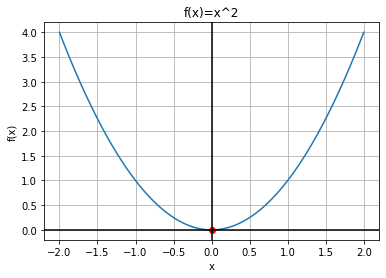

In [ ]:
import cmath  #Complejos
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return x ** 2

raiz=np.array(0) #Raices del polinomio
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x),raiz,raiz*0,"ro") #Generamos el plot de la funcion con la raiz ubicada en los puntos
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2')
plt.xlabel('x')
plt.ylabel('f(x)')

<h2><b> 2. Apply the Classic and Po Shen Loh ‘s methods for solving the following quadratic equation

<h2><b> Método clásico:  </h2></b>

Para resolver una ecuación cuadratica de la forma $ ax^{2} + bx + c$ por el método clásico utilizamos la formula: 

$$x =  \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$


En este caso estamos resolviendo el polinomio: $x^{2}$, entonces reemplazando en la formula tenemos: 

$$x =  \frac{-0 \pm \sqrt{0^2 - 0}}{2} $$

<center> $x_{1} = 0 $ y $x_{2} = 0$

In [ ]:
#Codigo metodo clasico
def classic(a, b, c):
    disc = (b**2) - 4*a*c
    if disc < 0: #Raiz compleja
        x1 = (-b + cmath.sqrt(disc))/(2*a)  #Raiz 1
        x2 = (-b - cmath.sqrt(disc))/(2*a)  #Raiz 2
    else: #Raiz real
        x1 = (-b + math.sqrt(disc))/(2*a)  #Raiz 1
        x2 = (-b - math.sqrt(disc))/(2*a)  #Raiz 2
    print("las raices del polinomio son: ", x1, "y ", x2) 

classic(1, 0, 0) #Polinomio x^2 (a=1, b=0, c=0)

las raices del polinomio son:  0.0 y  0.0


<h2><b> Método Po Shen Loh:  </h2></b>

Para resolver una ecuación cuadratica de la forma $ x^{2} + bx + c$ , (a = 1) por el método de Po Shen Loh: 

- Si encontramos $r$ y $s$ con suma $-b$ y producto $c$ entonces $x^{2} + bx + c = (x - r)(x - s) $ y estas son todas las posibles raices
- La suma de estos 2 numeros es $-b$ si ellos son $-\frac{b}{2} \pm u $ (donde u es arbitrario)
- Su producto es $c$ cuando $\frac{b^{2}}{4} - u = c$
- La raiz cuadrada siempre va a dar un valor valido u
- Entonces $\frac{b^{2}}{4} \pm u $ funcionará como r y como s, y estas serán las raices.
- Por lo tanto la forma general de cada raiz esta dada por: 

$$- \frac{b}{2} \pm \sqrt{ \frac{b^{2}}{4} - c} $$

En este caso estamos resolviendo el polinomio $x^2$ entonces: (b y c = 0)

$$- \frac{0}{2} \pm \sqrt{ \frac{0^{2}}{4} - 0} $$

<center> $x_{1} = 0 $ y $x_{2} = 0$

In [ ]:
#Codigo metodo Po Shen Loh
def PSL(b,c):
    rc = b**2/4 - c
    if rc < 0: #Raiz compleja
        x1 = -b/2 + cmath.sqrt(rc)
        x2 = -b/2 - cmath.sqrt(rc)
    else: #Raiz real
        x1 = -b/2 + math.sqrt(rc)
        x2 = -b/2 - math.sqrt(rc)
    print("las raices del polinomio son: ", x1, "y ", x2)

PSL(0, 0) #Polinomio x^2 (b=0, c=0)
    

las raices del polinomio son:  0.0 y  0.0


<h2><b> 3. To plot the newton fractal for the corresponding complex quadratic polynomial

In [ ]:

def f(z):  #Funcion 
    return z ** 2 

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 0
    r2 = 0

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 2

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration (m es la multiplicidad del polinomio)

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, m=m)
    plt.title('Newton Fractal f(x)=Z^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


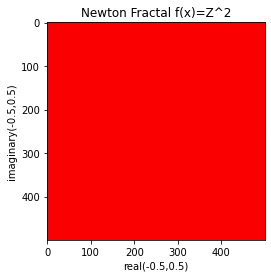

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


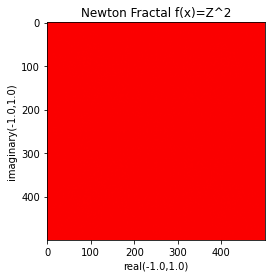

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


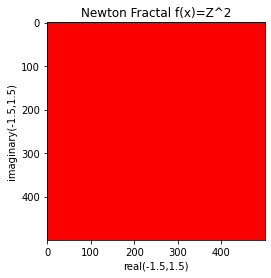

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


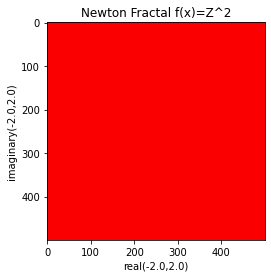

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


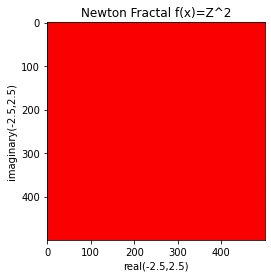

In [ ]:
print("zoom out")
display1(zoom=1, m=2)
display1(zoom=2, m=2)
display1(zoom=3, m=2)
display1(zoom=4, m=2)
display1(zoom=5, m=2)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


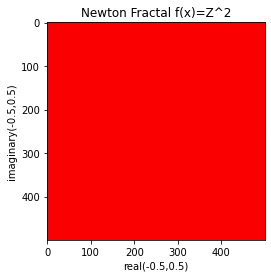

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


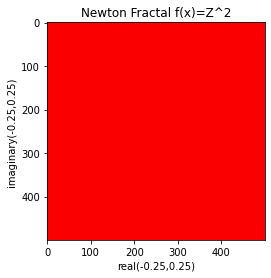

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


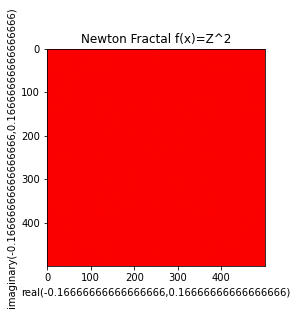

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


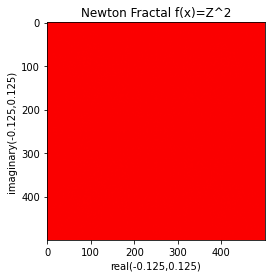

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


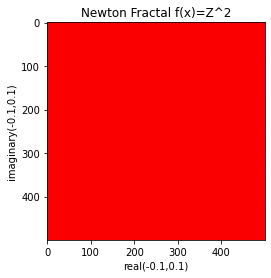

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


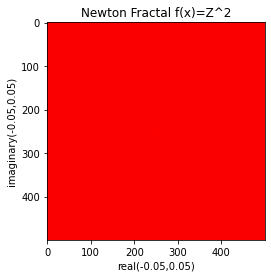

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


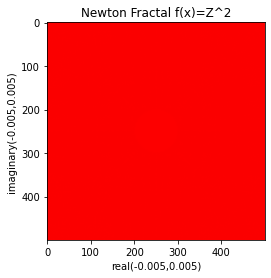

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


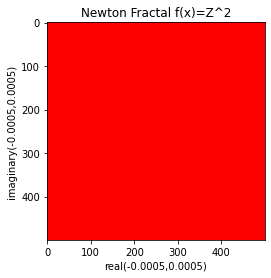

In [ ]:
print("zoom in")
display1(zoom=1, m=2)
display1(zoom=1/2, m=2)
display1(zoom=1/3, m=2)
display1(zoom=1/4, m=2)
display1(zoom=1/5, m=2)
display1(zoom=1/10, m=2)
display1(zoom=1/100, m=2)
display1(zoom=1/1000, m=2)

<h2><b> 4. Plot the Newton iterates for points on the positive and negative axes for the complex quadratic polynomials in 3.

<h3><b> Newton iterates form z=10.0 + 0.0j

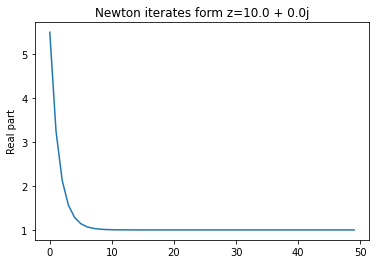

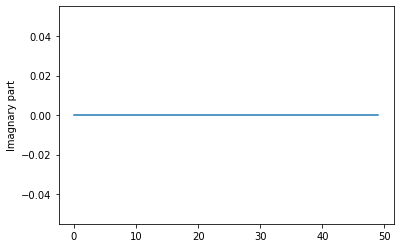

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

<h3><b> Newton iterates form z=-10.0 + 0.0j

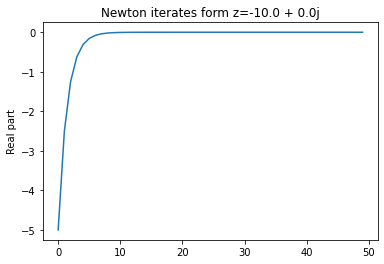

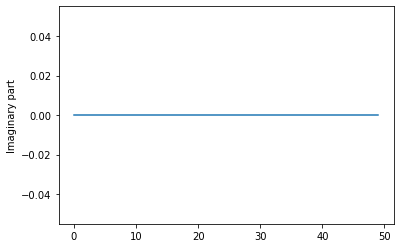

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=0.0 + 10.0j

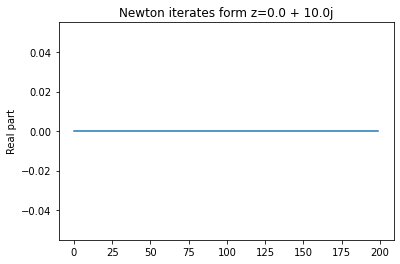

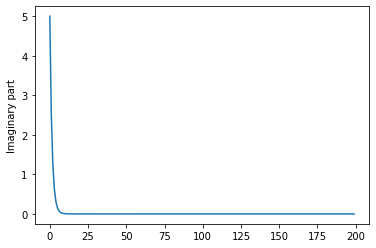

In [ ]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=0.0 - 10.0j

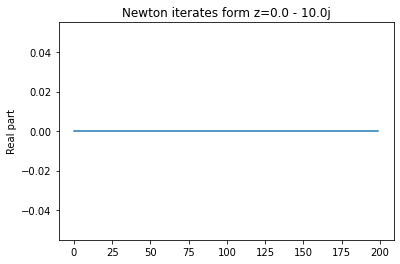

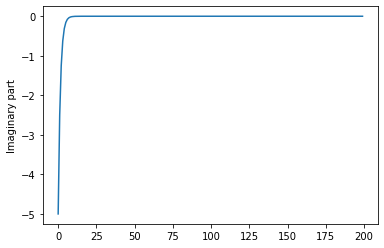

In [ ]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Análisis </h3></b>

Observando la parte con el eje reales podemos ver que no importa si es positivo o negativo, la parte real converge relativamente rápido a 0 (que es la raiz del polinomio), y la parte imaginaria se mantiene en 0. Ahora observando el eje imaginario, la parte real se mantiene en 0 y la parte imaginaria sin importar su signo converge de una velocidad similar a la parte con iteradas reales.

<h2><b> 5. Plot of the Newton's iterations for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomial in 3.

<h3><b> Newton iterates form z=10.0 + 10.0j

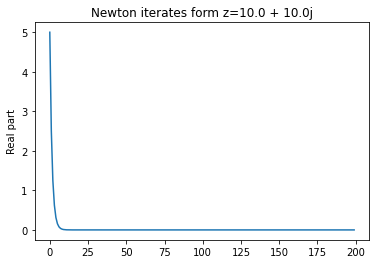

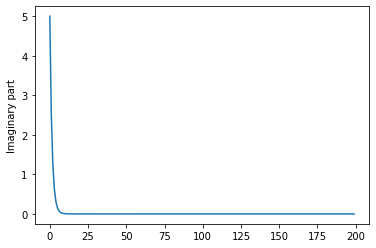

In [ ]:
z=10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=-10.0 + 10.0j

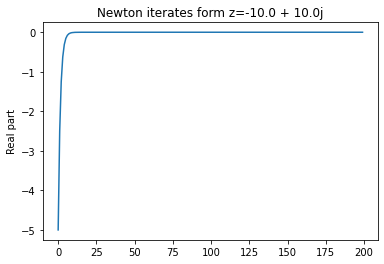

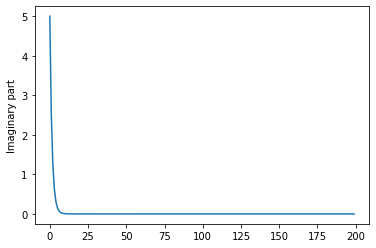

In [ ]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=10.0 - 10.0j

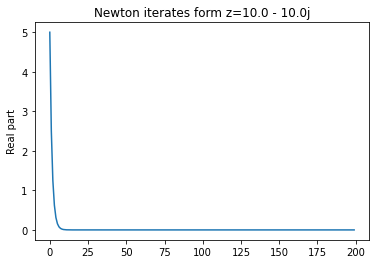

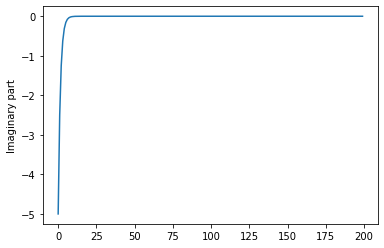

In [ ]:
z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=-10.0 -10.0j

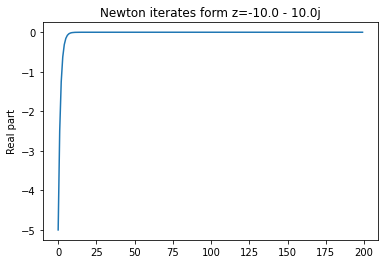

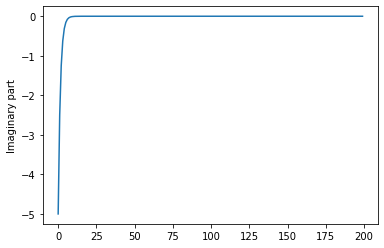

In [ ]:
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=0.0 + 0.0j

In [ ]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

<h1><b><center> Function: $(x-1)^{2}$

<h3><b> Análisis </h3></b>

Podemos observar que sin importar el signo, la parte real e imaginaria convergen a 0 a una velocidad rápida. Tambien en la ultima parte con z = 0.0 + 0.0j podemos ver que esta tendrá un error ya que al asignar la iteracion de newton z = z - f(z)/dz tenemos que dz es 2z y como evaluamos en 0 pues generará error de division por 0

<h2><b> 1. Plot the following functions in a x range that include that include the vertex and the roots (if there are roots)

Text(0, 0.5, 'f(x)')

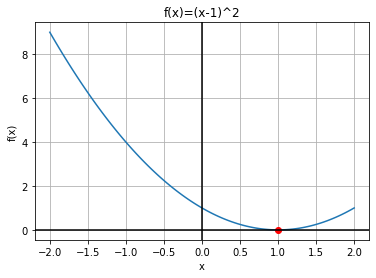

In [ ]:
def f(z):
    return (x-1)**2

raiz=np.array(1) #Raices del polinomio
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x),raiz,raiz*0,"ro") #Generamos el plot de la funcion con la raiz ubicada en los puntos
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x-1)^2')
plt.xlabel('x')
plt.ylabel('f(x)')

<h2><b> 2. Apply the Classic and Po Shen Loh ‘s methods for solving the following quadratic equation

<h2><b> Método clásico:  </h2></b>

Para resolver una ecuación cuadratica de la forma $ ax^{2} + bx + c$ por el método clásico utilizamos la formula: 

$$x =  \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$


En este caso estamos resolviendo el polinomio: $(x-1)^{2} = x^{2}-2x+1$, entonces reemplazando en la formula tenemos: (con a = 1, b = -2 y c = 1

$$x =  \frac{+2 \pm \sqrt{2^2 - 4}}{2} $$

<center> $x_{1} = 1 $ y $x_{2} = 1$

In [ ]:
classic(1,-2,1) #Polinomio (x-1)^2 = x^2 -2x + 1 metodo clasico

las raices del polinomio son:  1.0 y  1.0


<h2><b> Método Po Shen Loh:  </h2></b>

Para resolver una ecuación cuadratica de la forma $ x^{2} + bx + c$ , (a = 1) por el método de Po Shen Loh: 

- Si encontramos $r$ y $s$ con suma $-b$ y producto $c$ entonces $x^{2} + bx + c = (x - r)(x - s) $ y estas son todas las posibles raices
- La suma de estos 2 numeros es $-b$ si ellos son $-\frac{b}{2} \pm u $ (donde u es arbitrario)
- Su producto es $c$ cuando $\frac{b^{2}}{4} - u = c$
- La raiz cuadrada siempre va a dar un valor valido u
- Entonces $\frac{b^{2}}{4} \pm u $ funcionará como r y como s, y estas serán las raices.
- Por lo tanto la forma general de cada raiz esta dada por: 

$$- \frac{b}{2} \pm \sqrt{ \frac{b^{2}}{4} - c} $$

En este caso estamos resolviendo el polinomio $x^2$ entonces: (b = -2 y c = 1)

$$- \frac{-2}{2} \pm \sqrt{ \frac{(-2)^{2}}{4} - 1} $$

<center> $x_{1} = 1 $ y $x_{2} = 1$

In [ ]:
PSL(-2, 1) #Polinomio (x-1)^2 = x^2 -2x + 1 metodo Po Shen Loh

las raices del polinomio son:  1.0 y  1.0


<h2><b> 3. To plot the newton fractal for the corresponding complex quadratic polynomial

In [ ]:
def f(z):  #Funcion 
    return (z-1)**2 

def df(z):
    return 2 * (z-1)

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = 1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 2

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration (m es la multiplicidad del polinomio)

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, m=m)
    plt.title('Newton Fractal f(x)=(Z-1)^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


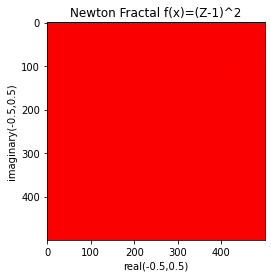

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


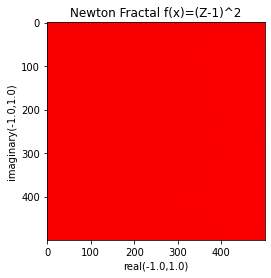

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


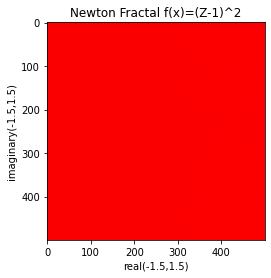

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


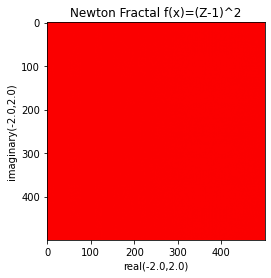

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


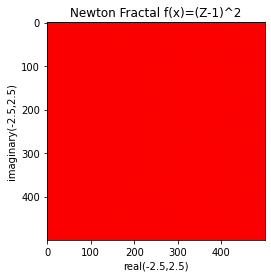

In [ ]:
print("zoom out")
display1(zoom=1, m=2)
display1(zoom=2, m=2)
display1(zoom=3, m=2)
display1(zoom=4, m=2)
display1(zoom=5, m=2)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


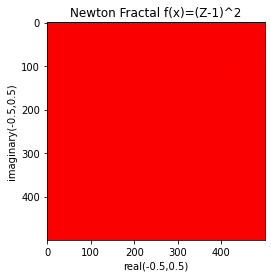

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


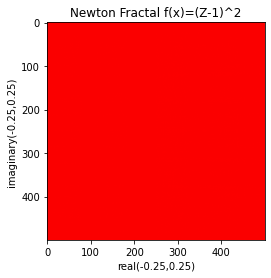

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


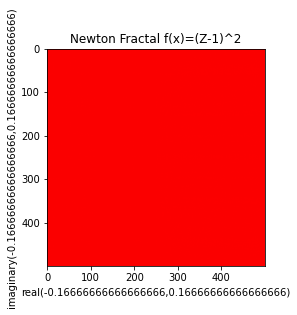

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


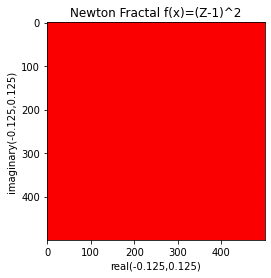

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


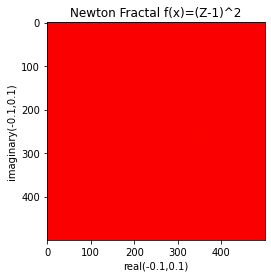

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


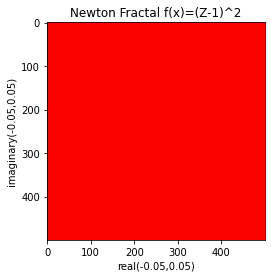

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


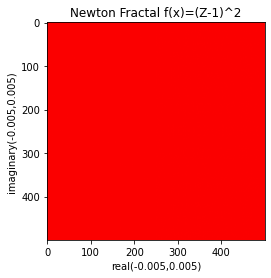

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


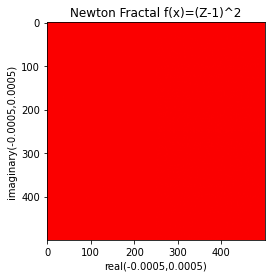

In [ ]:
print("zoom in")
display1(zoom=1, m=2)
display1(zoom=1/2, m=2)
display1(zoom=1/3, m=2)
display1(zoom=1/4, m=2)
display1(zoom=1/5, m=2)
display1(zoom=1/10, m=2)
display1(zoom=1/100, m=2)
display1(zoom=1/1000, m=2)

<h2><b> 4. Plot the Newton iterates for points on the positive and negative axes for the complex quadratic polynomials in 3.

<h3><b> Newton iterates form z=10.0 + 0.0j

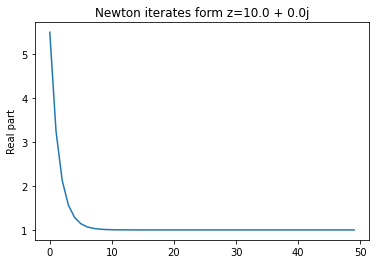

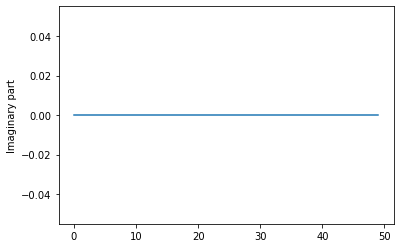

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=-10.0 + 0.0j

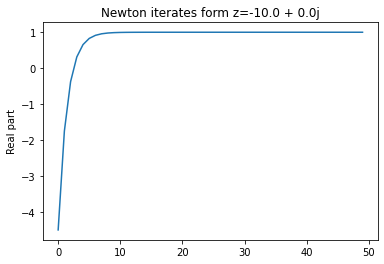

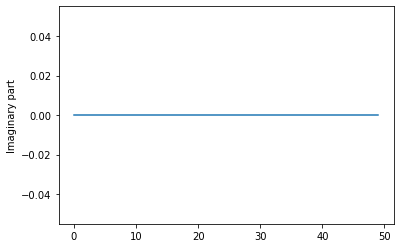

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=0.0 + 10.0j

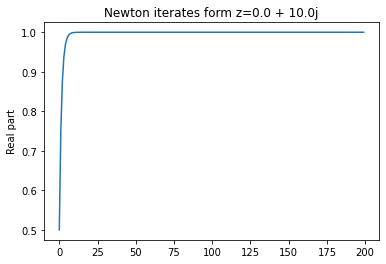

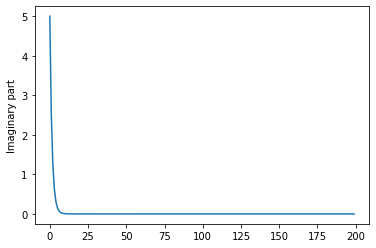

In [ ]:
z=0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=0.0 - 10.0j

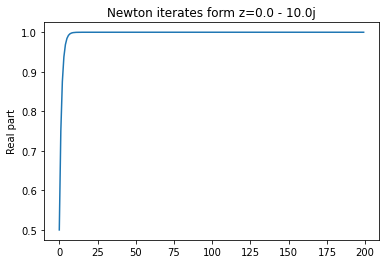

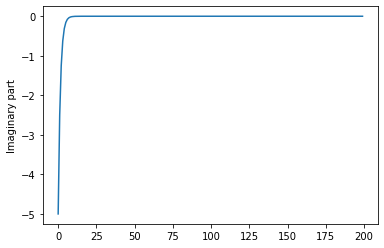

In [ ]:
z=0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Análisis </h3></b>

Podemos observar que con el eje con componente real sin importar el signo la parte real converge rapidamente a 1 y la parte imaginaria se mantiene en 0. Pero si observamos con el eje con componente imaginario podemos ver que la parte real se mantendrá convergiendo a 1 mientras que la imaginaria convergerá a 0 de manera rápida

<h2><b> 5. Plot of the Newton's iterations for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomial in 3.

<h3><b> Newton iterates form z=10.0 + 10.0j

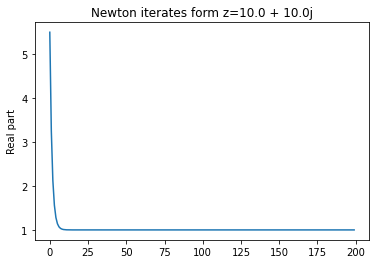

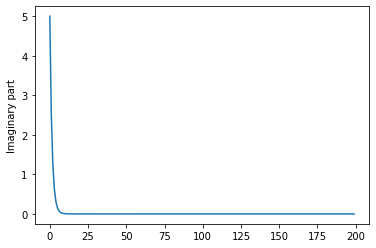

In [ ]:
z=10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=10.0 - 10.0j

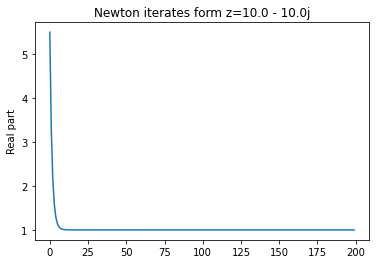

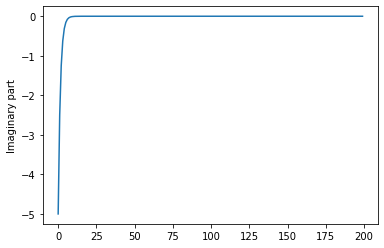

In [ ]:
z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=-10.0 + 10.0j

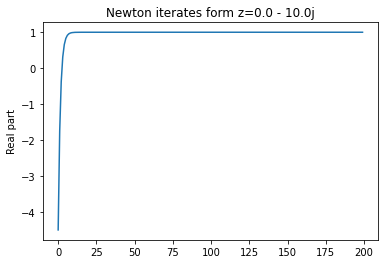

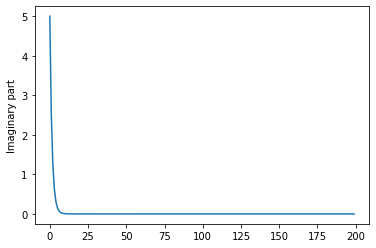

In [ ]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=-10.0 - 10.0j

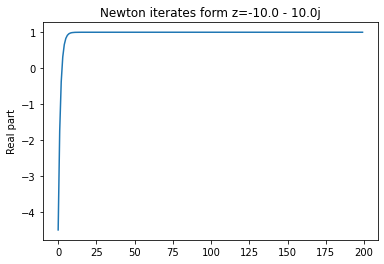

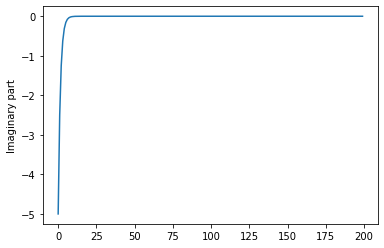

In [ ]:
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=0.0 + 0.0j

In [ ]:
z=0.0 - 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

<h3><b> Análisis </h3></b>

Podemos observar que sin importar el signo ni del eje, la parte real convergerá a 1 y la parte imaginaria convergerá a 0 a una velocidad rápida. Tambien en la ultima parte con z = 0.0 + 0.0j podemos ver que esta tendrá un error ya que al asignar la iteracion de newton z = z - f(z)/dz tenemos que dz es 2z y como evaluamos en 0 pues generará error de division por 0

<h1><b><center> Function: $x^{2}-1$

<h2><b> 1. Plot the following functions in a x range that include that include the vertex and the roots (if there are roots)

Text(0, 0.5, 'f(x)')

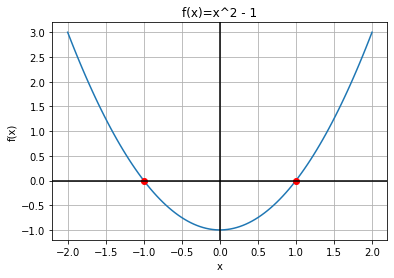

In [ ]:
def f(z):
    return x ** 2 - 1

raiz=np.array([-1,1]) #Raices del polinomio
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x),raiz,raiz*0,"ro") #Generamos el plot de la funcion con la raiz ubicada en los puntos
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2 - 1')
plt.xlabel('x')
plt.ylabel('f(x)')

<h2><b> 2. Apply the Classic and Po Shen Loh ‘s methods for solving the following quadratic equation

<h2><b> Método clásico:  </h2></b>

Para resolver una ecuación cuadratica de la forma $ ax^{2} + bx + c$ por el método clásico utilizamos la formula: 

$$x =  \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$


En este caso estamos resolviendo el polinomio: $x^{2} - 1$, entonces reemplazando en la formula tenemos: (con a = 1, b = 0, c = -1)

$$x =  \frac{-0 \pm \sqrt{0^2 + 4}}{2} $$

<center> $x_{1} = 1 $ y $x_{2} = -1$

In [ ]:
classic(1,0,-1) #Polinomio x^2 - 1 metodo clasico

las raices del polinomio son:  1.0 y  -1.0


<h2><b> Método Po Shen Loh:  </h2></b>

Para resolver una ecuación cuadratica de la forma $ x^{2} + bx + c$ , (a = 1) por el método de Po Shen Loh: 

- Si encontramos $r$ y $s$ con suma $-b$ y producto $c$ entonces $x^{2} + bx + c = (x - r)(x - s) $ y estas son todas las posibles raices
- La suma de estos 2 numeros es $-b$ si ellos son $-\frac{b}{2} \pm u $ (donde u es arbitrario)
- Su producto es $c$ cuando $\frac{b^{2}}{4} - u = c$
- La raiz cuadrada siempre va a dar un valor valido u
- Entonces $\frac{b^{2}}{4} \pm u $ funcionará como r y como s, y estas serán las raices.
- Por lo tanto la forma general de cada raiz esta dada por: 

$$- \frac{b}{2} \pm \sqrt{ \frac{b^{2}}{4} - c} $$

En este caso estamos resolviendo el polinomio $x^2 - 1$ entonces: (b = 0 y c = -1)

$$- \frac{0}{2} \pm \sqrt{ \frac{0^{2}}{4} + 1} $$

<center> $x_{1} = 1 $ y $x_{2} = -1$

In [ ]:
PSL(0,-1) #Polinomio x^2 - 1 metodo Po Shen Loh

las raices del polinomio son:  1.0 y  -1.0


<h2><b> 3. To plot the newton fractal for the corresponding complex quadratic polynomial

In [ ]:
def f(z):  #Funcion 
    return z**2 -1

def df(z):
    return 2*z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration (m es la multiplicidad del polinomio)

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, m=m)
    plt.title('Newton Fractal f(x)=Z^2 - 1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


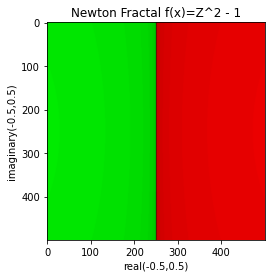

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


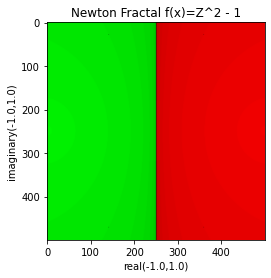

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


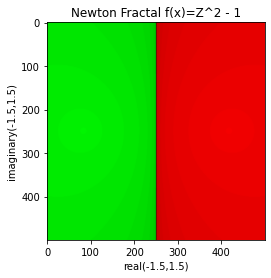

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


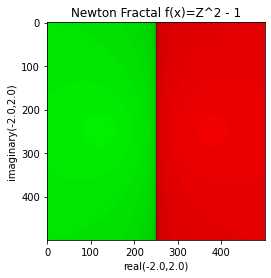

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


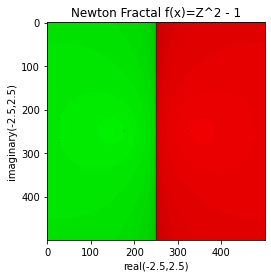

In [ ]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


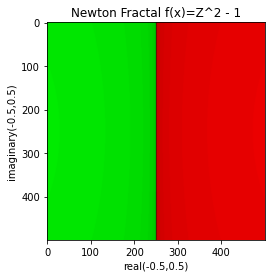

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


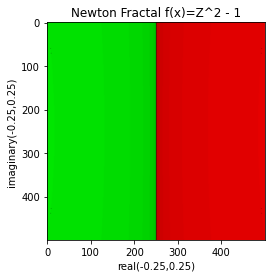

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


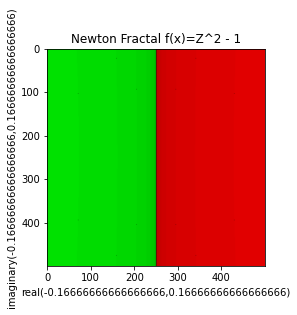

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


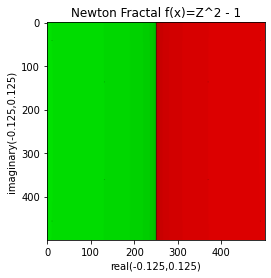

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


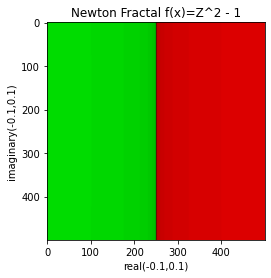

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


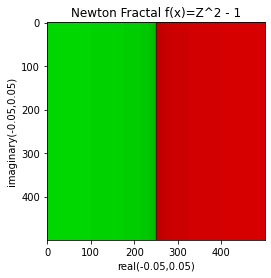

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


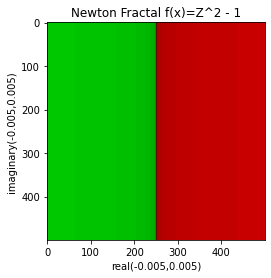

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


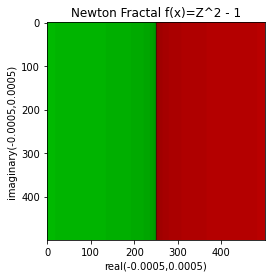

In [ ]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

<h2><b> 4. Plot the Newton iterates for points on the positive and negative axes for the complex quadratic polynomials in 3.

<h3><b> Newton iterates form z=10.0 + 0.0j

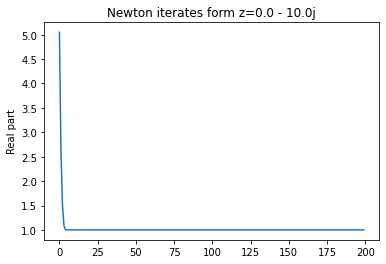

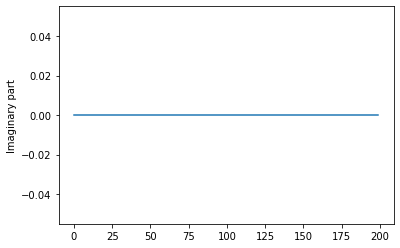

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=-10.0 + 0.0j

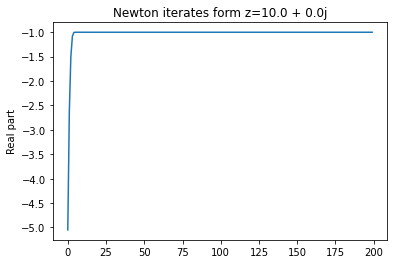

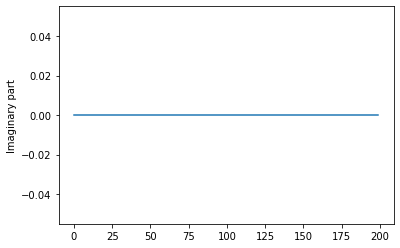

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=0.0 + 10.0j


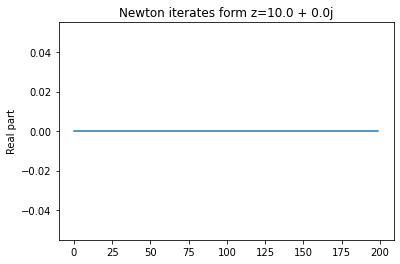

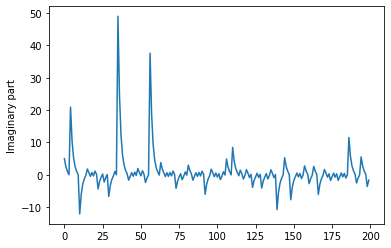

In [ ]:
z=0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=0.0 - 10.0j

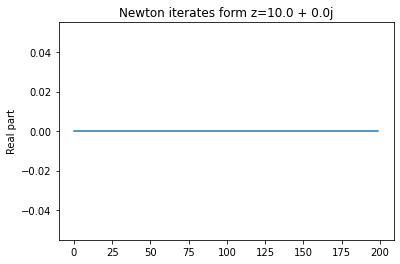

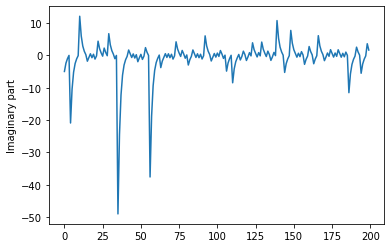

In [ ]:
z=0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Análisis </h3></b>

Podemos observar que en el eje real que mientras la parte imaginaria se mantiene en 0 la parte real si es negativa converge hacia -1 y si es positiva converge a 1. Ahora con el eje imaginario podemos ver que mientras la parte real se mantiene en 0 la parte imaginaria va a diverger sin importar el signo que tenga

<h2><b> 5. Plot of the Newton's iterations for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomial in 3.

<h3><b> Newton iterates form z=10.0 + 10.0j

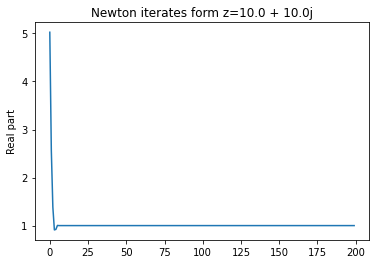

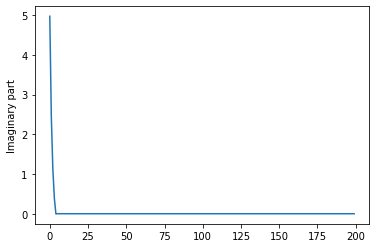

In [ ]:
z=10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=-10.0 + 10.0j

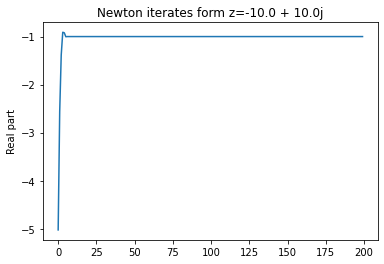

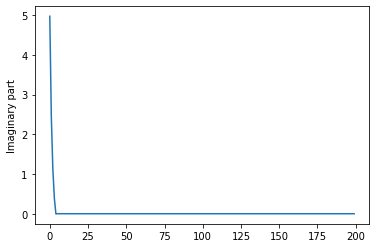

In [ ]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=10.0 - 10.0j

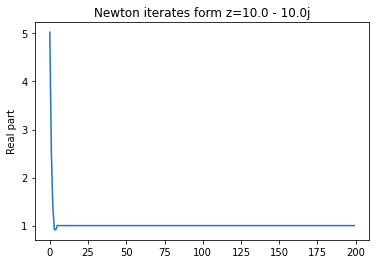

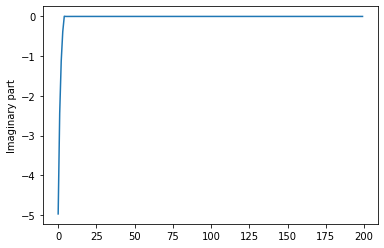

In [ ]:
z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=-10.0 - 10.0j

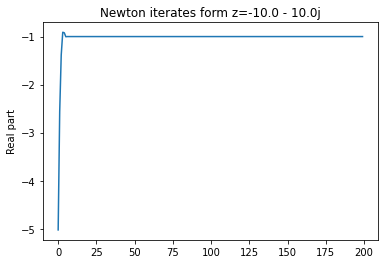

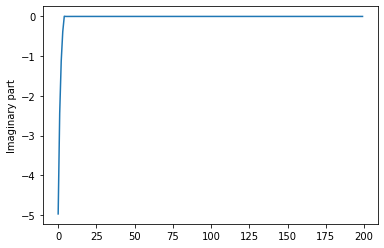

In [ ]:
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=0.0 + 0.0j

In [ ]:
z=0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

<h3><b> Análisis </h3></b>

Podemos observar que la parte real mientras sea positiva convergerá a 1 y si es negativa convergerá a -1 y la parte imaginaria convergerá a 0 a una velocidad rápida. Tambien en la ultima parte con z = 0.0 + 0.0j podemos ver que esta tendrá un error ya que al asignar la iteracion de newton z = z - f(z)/dz tenemos que dz es 2z y como evaluamos en 0 pues generará error de division por 0

<h1><b><center> Function: $x^{2}+1$

<h2><b> 1. Plot the following functions in a x range that include that include the vertex and the roots (if there are roots)

Text(0, 0.5, 'f(x)')

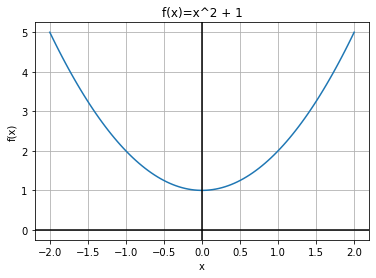

In [ ]:
def f(z):
    return x ** 2 + 1

#Esta vez el polinomio no tiene raices reales
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x)) #Generamos el plot de la funcion 
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2 + 1')
plt.xlabel('x')
plt.ylabel('f(x)')

<h2><b> 2. Apply the Classic and Po Shen Loh ‘s methods for solving the following quadratic equation

<h2><b> Método clásico:  </h2></b>

Para resolver una ecuación cuadratica de la forma $ ax^{2} + bx + c$ por el método clásico utilizamos la formula: 

$$x =  \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$


En este caso estamos resolviendo el polinomio: $x^{2} + 1$, entonces reemplazando en la formula tenemos: (con a = 1 , b = 0 y c = 1)

$$x =  \frac{-0 \pm \sqrt{0^2 - 4}}{2} $$

<center> $x_{1} = i $ y $x_{2} = -i$

In [ ]:
classic(1,0,1) #Polinomio x^2 + 1 metodo clasico

las raices del polinomio son:  1j y  -1j


<h2><b> Método Po Shen Loh:  </h2></b>

Para resolver una ecuación cuadratica de la forma $ x^{2} + bx + c$ , (a = 1) por el método de Po Shen Loh: 

- Si encontramos $r$ y $s$ con suma $-b$ y producto $c$ entonces $x^{2} + bx + c = (x - r)(x - s) $ y estas son todas las posibles raices
- La suma de estos 2 numeros es $-b$ si ellos son $-\frac{b}{2} \pm u $ (donde u es arbitrario)
- Su producto es $c$ cuando $\frac{b^{2}}{4} - u = c$
- La raiz cuadrada siempre va a dar un valor valido u
- Entonces $\frac{b^{2}}{4} \pm u $ funcionará como r y como s, y estas serán las raices.
- Por lo tanto la forma general de cada raiz esta dada por: 

$$- \frac{b}{2} \pm \sqrt{ \frac{b^{2}}{4} - c} $$

En este caso estamos resolviendo el polinomio $x^2 + 1$ entonces: (b = 0 y c = 1)

$$- \frac{0}{2} \pm \sqrt{ \frac{0^{2}}{4} - 1} $$

<center> $x_{1} = i $ y $x_{2} = -i$

In [ ]:
PSL(0,1) #Polinomio x^2 + 1 metodo Po Shen Loh

las raices del polinomio son:  1j y  -1j


<h2><b> 3. To plot the newton fractal for the corresponding complex quadratic polynomial

In [ ]:
def f(z):  #Funcion 
    return z**2 + 1

def df(z):
    return 2*z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = complex(0.0, 1.0)
    r2 = complex(0.0, -1.0)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration (m es la multiplicidad del polinomio)

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256, m=1):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, m=m)
    plt.title('Newton Fractal f(x)=Z^2 - 1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


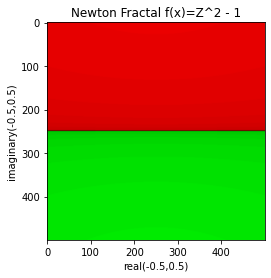

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


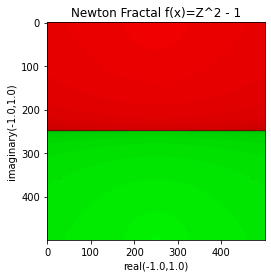

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


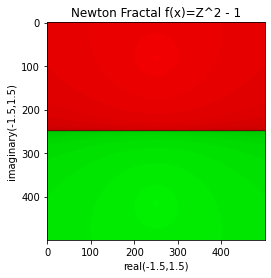

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


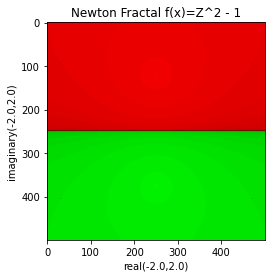

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


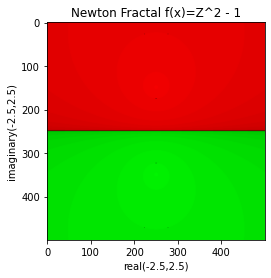

In [ ]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


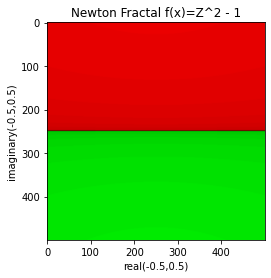

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


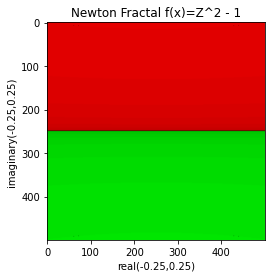

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


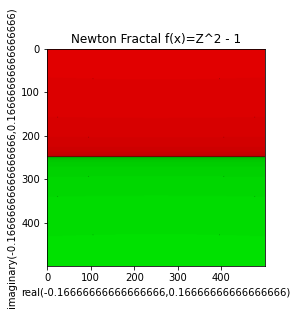

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


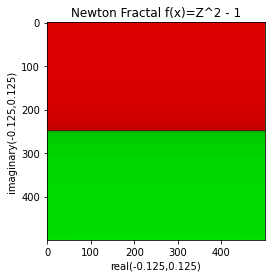

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


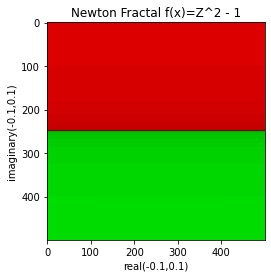

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


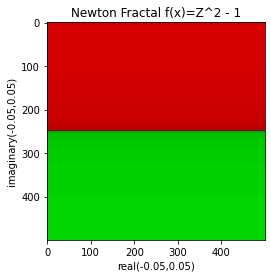

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


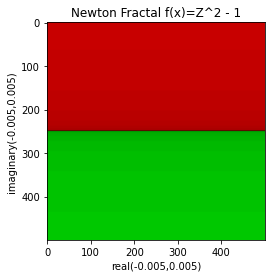

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


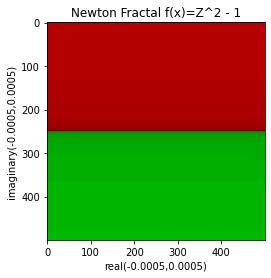

In [ ]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

<h2><b> 4. Plot the Newton iterates for points on the positive and negative axes for the complex quadratic polynomials in 3.

<h3><b> Newton iterates form z=10.0 + 0.0j

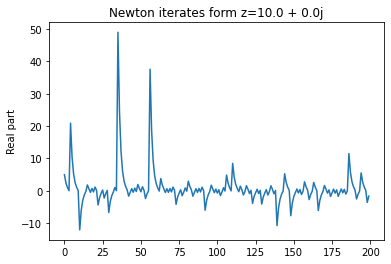

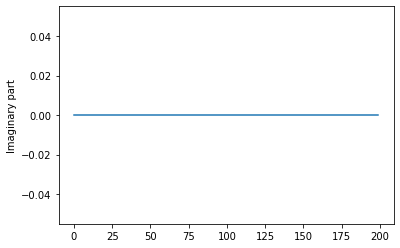

In [ ]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=-10.0 + 0.0j

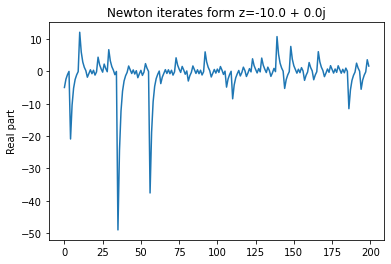

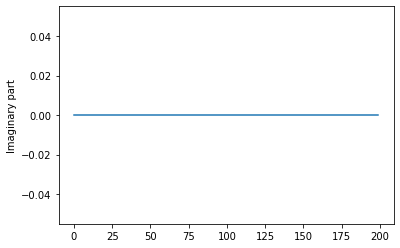

In [ ]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=0.0 + 10.0j

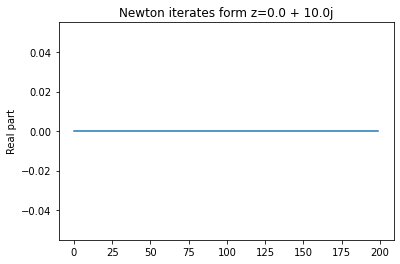

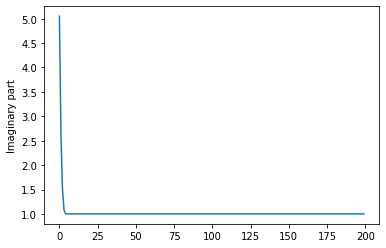

In [ ]:
z=0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=0.0 - 10.0j

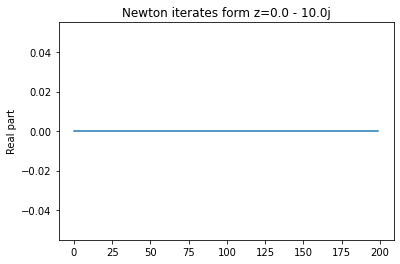

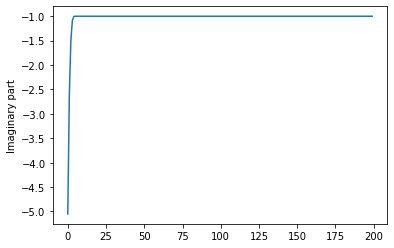

In [ ]:
z=0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Análisis </h3></b>

Podemos observar que en el eje real sin importar el signo diverge mientras que la parte imaginaria converge a 0, y en el eje imaginario si es positivo converge a 1 y si es negativo converge a -1

<h2><b> 5. Plot of the Newton's iterations for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomial in 3.

<h3><b> Newton iterates form z=10.0 + 10.0j

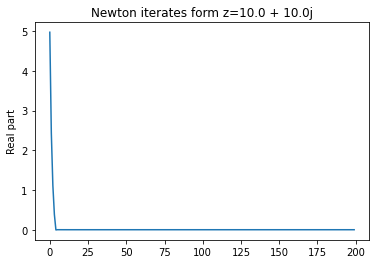

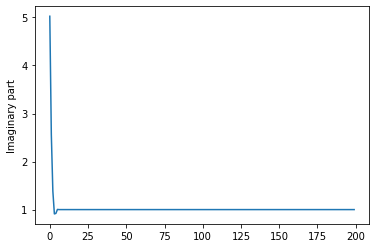

In [ ]:
z=10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=10.0 - 10.0j

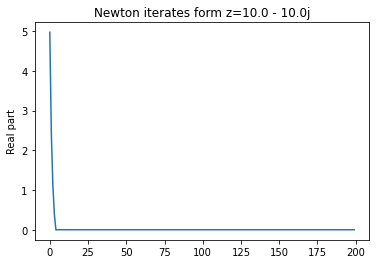

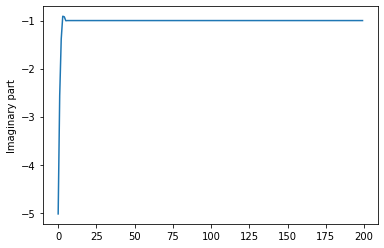

In [ ]:
z=10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=-10.0 + 10.0j

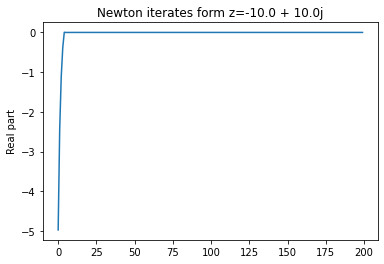

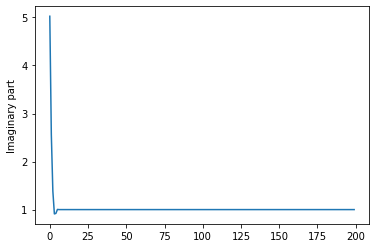

In [ ]:
z=-10.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=-10.0 - 10.0j

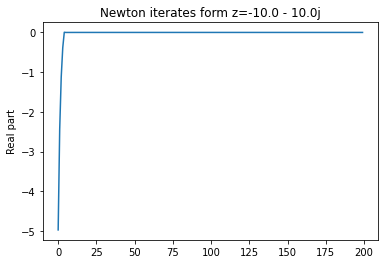

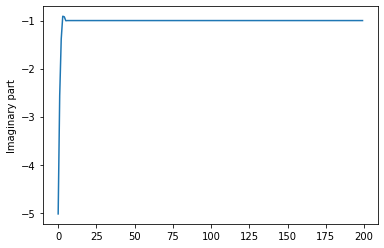

In [ ]:
z=-10.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

<h3><b> Newton iterates form z=0.0 + 0.0j

In [ ]:
z=0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

<h3><b> Análisis </h3></b>

Podemos observar que la parte imaginaria mientras sea positiva convergerá a 1 y si es negativa convergerá a -1 y la parte real convergerá a 0 a una velocidad rápida. Tambien en la ultima parte con z = 0.0 + 0.0j podemos ver que esta tendrá un error ya que al asignar la iteracion de newton z = z - f(z)/dz tenemos que dz es 2z y como evaluamos en 0 pues generará error de division por 0